In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [3]:
df = pd.read_csv('people_count.csv',
                 names=['timestamp', 'value', 'filepath'],
                 header=None,
                 sep=',',
                 parse_dates=['timestamp'])

In [8]:
df.dtypes

,0
timestamp,datetime64[ns]
value,int64
filepath,object


In [10]:
df.value.count()

2923

In [11]:
df_grouped = df.groupby(pd.Grouper(key='timestamp', freq='10T'))['value'].sum()

<ipython-input-11-f48cfa87d289>:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_grouped = df.groupby(pd.Grouper(key='timestamp', freq='10T'))['value'].sum()


In [14]:
df_grouped

,value
timestamp,
2025-01-12 16:10:00,92
2025-01-12 16:20:00,165
2025-01-12 16:30:00,155
2025-01-12 16:40:00,199
2025-01-12 16:50:00,135
2025-01-12 17:00:00,116
2025-01-12 17:10:00,132
2025-01-12 17:20:00,114
2025-01-12 17:30:00,104


In [24]:
df_grouped = df_grouped.reset_index()

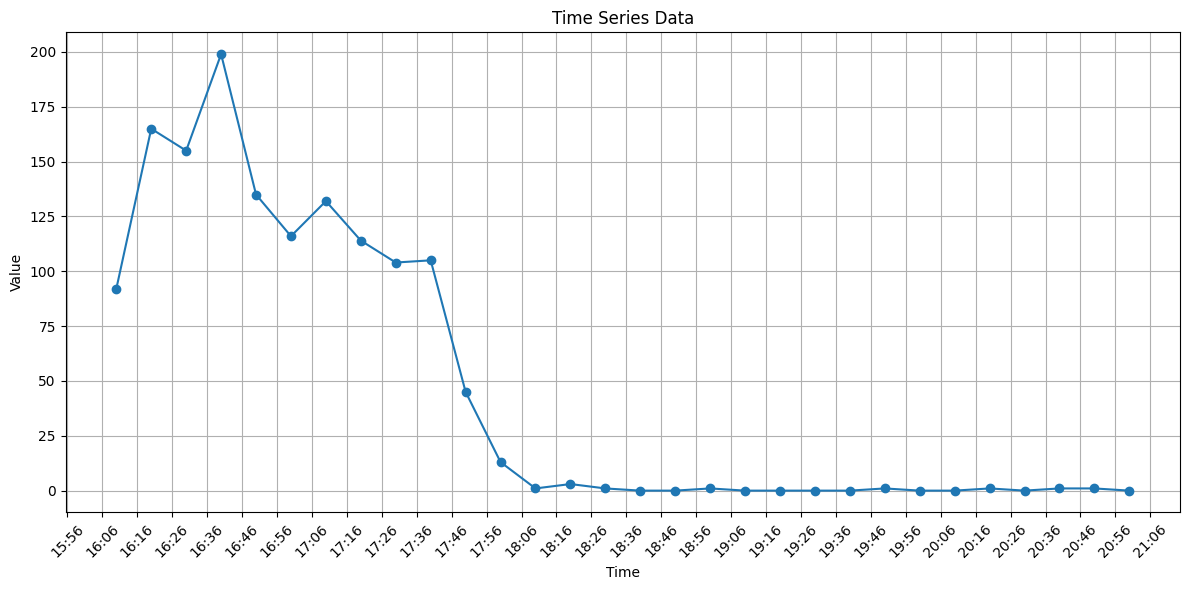

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['timestamp'], df_grouped['value'], marker='o')

time_formatter = DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(time_formatter)

# Set x-axis ticks every 10 minutes
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=10))

# Customize the plot
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()